In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATASET_DIR = 'D:/dataset_car/kcar_preprocessed/kcar'
BATCH_SIZE = 16
LEARNING_RATE = 0.001
EPOCH = 10
SAVE_DIR = './result/'

In [3]:
# GET DEVICE AND CHECK.
gpu_flag = torch.cuda.is_available()
device = torch.device("cuda" if gpu_flag else "cpu")
print("GPU INFO : ", torch.cuda.get_device_name(device))

GPU INFO :  GeForce GTX 1060 6GB


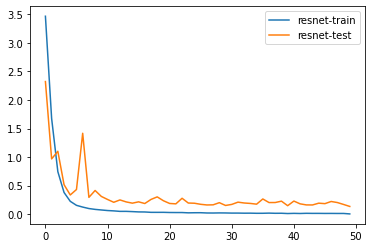

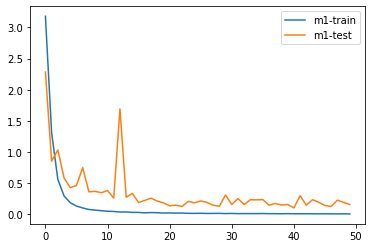

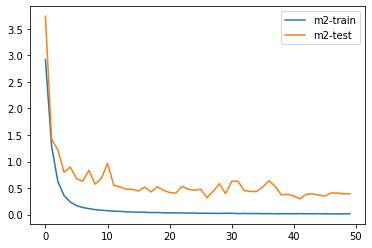

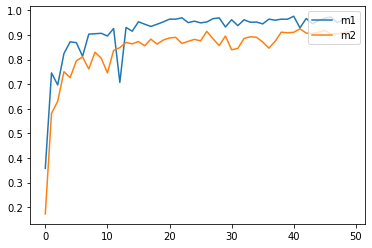

In [6]:
train_loss_resnet = np.load('./result/resnet/train_loss.npy', allow_pickle=True)
test_loss_resnet = np.load('./result/resnet/test_loss.npy', allow_pickle=True)

train_loss_m1 = np.load('./result/model_1/train_loss.npy', allow_pickle=True)
test_loss_m1 = np.load('./result/model_1/test_loss.npy', allow_pickle=True)
test_acc_m1 = np.load('./result/model_1/test_acc.npy', allow_pickle=True)

train_loss_m2 = np.load('./result/model_2/train_loss.npy', allow_pickle=True)
test_loss_m2 = np.load('./result/model_2/test_loss.npy', allow_pickle=True)
test_acc_m2 = np.load('./result/model_2/test_acc.npy', allow_pickle=True)


x_axis = [i for i in range(50)]
plt.plot(x_axis, train_loss_resnet, label='resnet-train')
plt.plot(x_axis, test_loss_resnet, label='resnet-test')
plt.legend(loc='upper right')
plt.show()

plt.plot(x_axis, train_loss_m1, label='m1-train')
plt.plot(x_axis, test_loss_m1, label='m1-test')
plt.legend(loc='upper right')
plt.show()

plt.plot(x_axis, train_loss_m2, label='m2-train')
plt.plot(x_axis, test_loss_m2, label='m2-test')
plt.legend(loc='upper right')
plt.show()

plt.plot(x_axis, test_acc_m1, label='m1')
plt.plot(x_axis, test_acc_m2, label='m2')
plt.legend(loc='upper right')
plt.show()